In [1]:
import pygal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
base_html = u"""
<!DOCTYPE html>
<html>
 <head>
   <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
   <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
 </head>
 <body>
   <figure>
    {rendered_chart}
   </figure>
 </body>
</html>
"""

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

In [4]:
df = pd.read_csv('data/superstore.csv', encoding_errors='ignore')

In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.5820


## Box Plot

### Seaborn

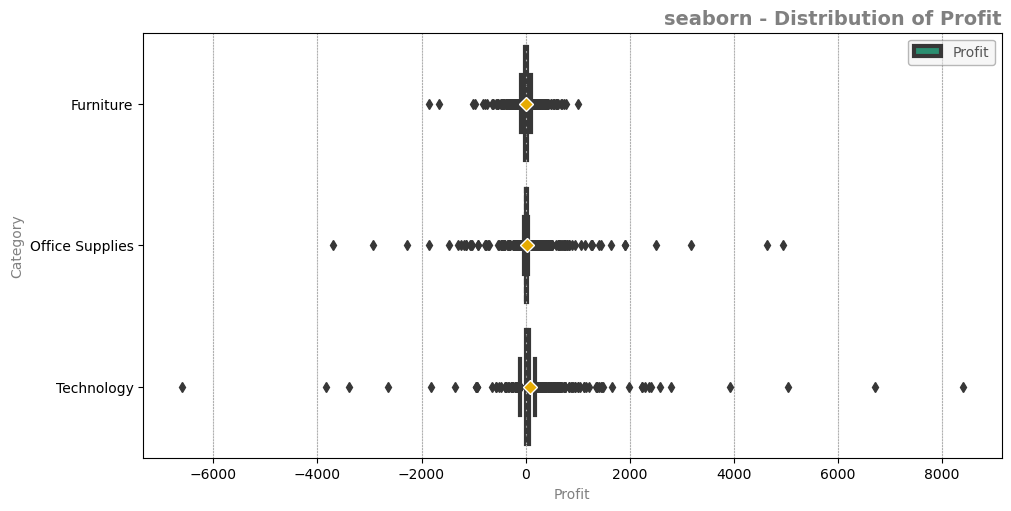

In [6]:
# Graph Size Configuration
plt.figure(figsize=(10,5))    # figsize = (width,height)


# Create histogram using seaborn
sns.boxplot(data = df,
            x = 'Profit',
            y = 'Category')

# Add Title to the graph
plt.title('seaborn - Distribution of Profit')

# Add Legend
plt.legend(['Profit'])

# Save Picture to Computer
plt.savefig('visualization_profit.png')

# Showing only the graph
plt.show()

### Pygal

In [7]:
# pygal visualization
box_plot = pygal.Box(box_mode="tukey", # Mode of box plot, tukey = boxplot whisker is 1.5 * Q1 and 1.5 * Q3
                     explicit_size=True, height=600, width=700  # Changing graph size
                     )

# pygal add title
box_plot.title = 'pygal - Distribution of Profit'
box_plot.x_title = 'Category'
box_plot.y_title = 'Profit'

# pygal add graph
box_plot.add('Furniture', df['Profit'][df['Category'] == 'Furniture'])
box_plot.add('Office Supplies', df['Profit'][df['Category'] == 'Office Supplies'])
box_plot.add('Technology', df['Profit'][df['Category'] == 'Technology'])

# pygal save file
box_plot.render_to_file('Boxplot.svg')

# display graph
display(HTML(base_html.format(rendered_chart=box_plot.render(is_unicode=True))))

## Bar Chart

### Seaborn

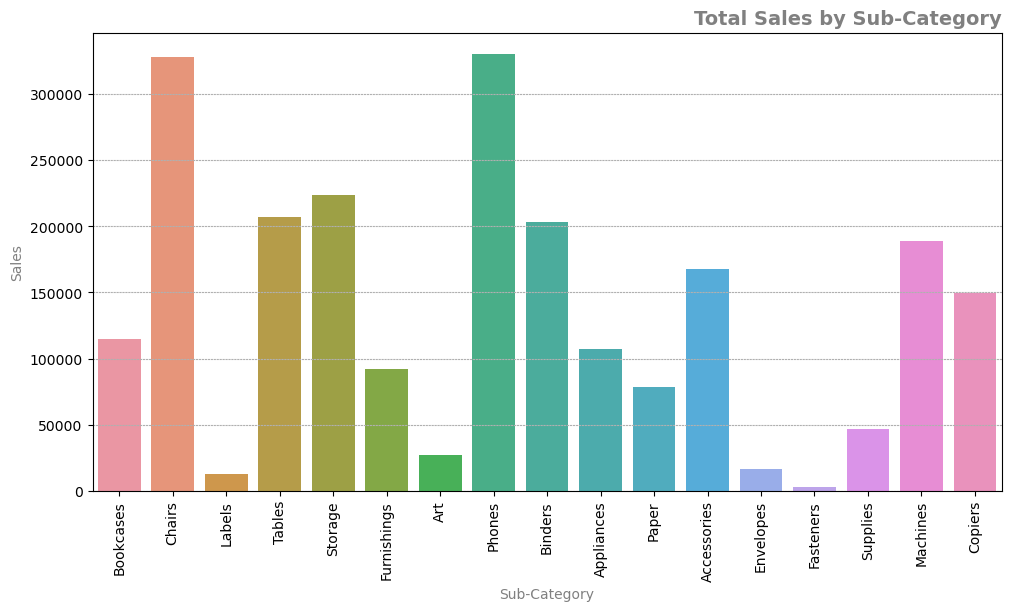

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,
            x = 'Sub-Category',
            y = 'Sales',
            errorbar=('ci', 0),
            estimator='sum') # by default estimator --> mean
plt.xticks(rotation=90)
plt.title("Total Sales by Sub-Category")
plt.show()

### Pygal

In [9]:
total_per_sub = df.groupby('Sub-Category')['Sales'].sum()


bar = pygal.Bar(explicit_size=True, height=650, width=1200,
                truncate_label=-1)
bar.title = 'pygal - Total Sales by Sub-Category'


[bar.add(x[0], x[1]) for x in total_per_sub.items()]


bar.value_formatter = lambda x: "%.2f" % x
bar.y_title = 'Total Sales'
bar.x_title = 'Sub-Category'


bar.render_to_file('Barplot.svg')


display(HTML(base_html.format(rendered_chart=bar.render(is_unicode=True))))
# change pygal.Bar() to pygal.HorizontalBar() for horizontal bar

## Line Chart

### Seaborn

In [10]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.5820


In [11]:
df['Month_'] = df['Order Date'].str.split('/', expand=True)[0]
df['Month_'] = df['Month_'].astype(str).str.pad(width=2, fillchar='0')
df['Month_'].unique()

array(['11', '06', '10', '04', '12', '05', '08', '07', '09', '01', '03',
       '02'], dtype=object)

In [12]:
df.insert(3, 'Order Month', df['Order Date'].str.split('/', expand=True)[2]+'-'+df['Month_'])

In [13]:
df.head(3)

,Row ID,Order ID,Order Date,Order Month,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_
0,1,CA-2016-152156,11/8/2016,2016-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11
1,2,CA-2016-152156,11/8/2016,2016-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0.0,219.5820,11
2,3,CA-2016-138688,6/12/2016,2016-06,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0.0,6.8714,06


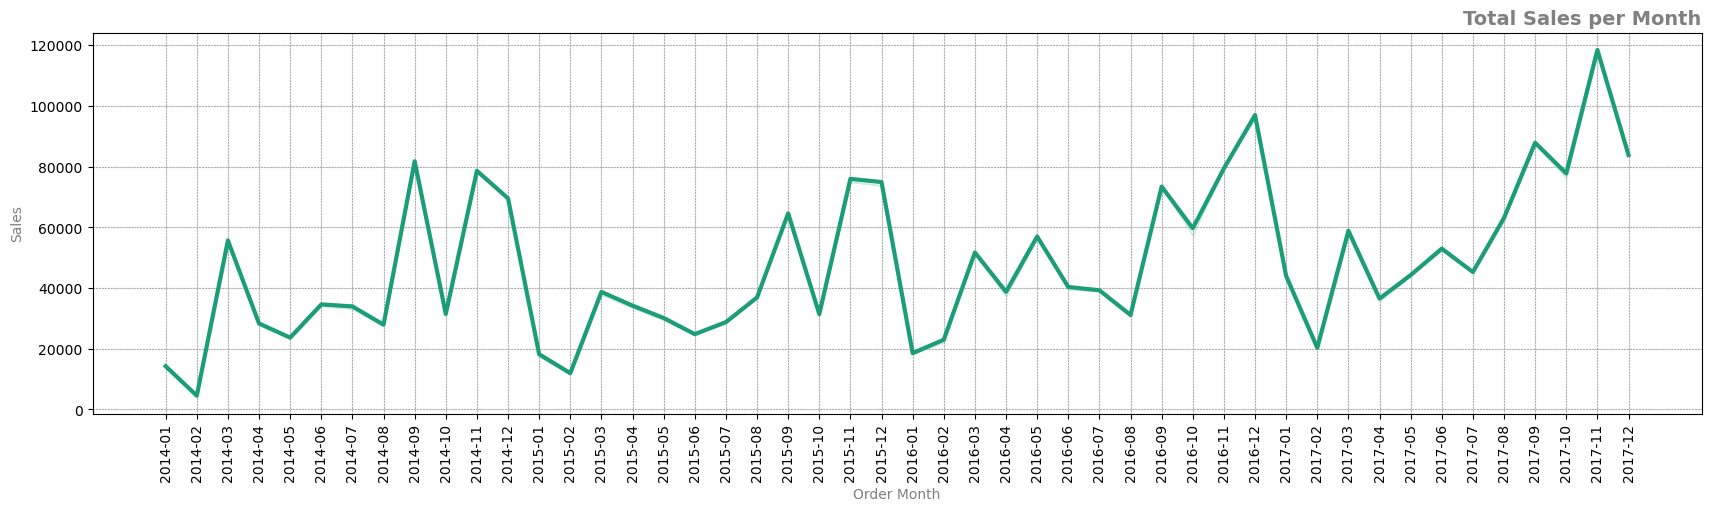

In [14]:
plt.figure(figsize=(17,5))
plt.title('Total Sales per Month')
sns.lineplot(data = df.sort_values('Order Month', ascending=True),
             x = 'Order Month',
             y = 'Sales',
             errorbar=('ci', 0),  # removing confidence interval
             estimator=np.sum) # estimator by default : mean
plt.xticks(rotation=90)
plt.show()

### Pygal

In [15]:
total_by_month = df.sort_values('Order Month', ascending=True).groupby('Order Month')['Sales'].sum()

from datetime import date
label = [date(2014, x, 1) for x in range(1,13)]
label.extend([date(2015, x, 1) for x in range(1,13)])
label.extend([date(2016, x, 1) for x in range(1,13)])
label.extend([date(2017, x, 1) for x in range(1,13)])

value = zip(label, total_by_month)
total_sales = list(value)

In [16]:
line = pygal.DateLine(explicit_size=True, height=650, width=1200,
                truncate_label=-1, x_label_rotation=-90)
line.title = 'pygal - Total Sales per Month'
line.x_labels = label
line.add('Sales', total_sales)

line.value_formatter = lambda x: "%.2f" % x

line.x_title = 'Month'
line.y_title = 'Total Sales'

line.render_to_file('Linechart.svg')

display(HTML(base_html.format(rendered_chart=line.render(is_unicode=True))))

## Scatter Chart

### Seaborn

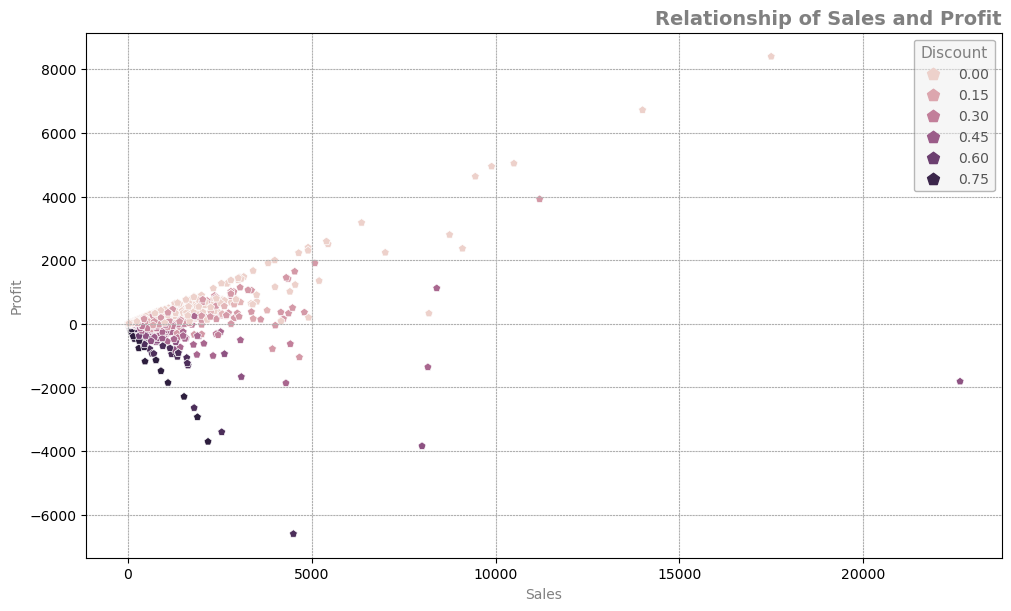

In [17]:
plt.figure(figsize= (10,6))
plt.title('Relationship of Sales and Profit')
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Discount')
plt.show()

### Pygal

In [18]:
# Zip the sales and profit data grouped by the discount amount
dis0 = zip(df[df['Discount'] == 0]['Sales'],df[df['Discount'] == 0]['Profit'])
dis15 = zip(df[df['Discount'].between(0.1,0.15)]['Sales'],df[df['Discount'].between(0.1,0.15)]['Profit'])
dis30 = zip(df[df['Discount'].between(0.16,0.30)]['Sales'],df[df['Discount'].between(0.16,0.30)]['Profit'])
dis45 = zip(df[df['Discount'].between(0.31,0.45)]['Sales'],df[df['Discount'].between(0.31,0.45)]['Profit'])
dis60 = zip(df[df['Discount'].between(0.46,0.60)]['Sales'],df[df['Discount'].between(0.46,0.60)]['Profit'])
dis75 = zip(df[df['Discount'] > 0.60]['Sales'],df[df['Discount'] > 0.60]['Profit'])

In [19]:
dis0 = list(dis0)
dis15 = list(dis15)
dis30 = list(dis30)
dis45 = list(dis45)
dis60 = list(dis60)
dis75 = list(dis75)

In [20]:
scatter = pygal.XY(stroke=False)
scatter.title = 'Relationship of Sales and Profit'


scatter.add('Discount 0', dis0)
scatter.add('Discount 15', dis15)
scatter.add('Discount 30', dis30)
scatter.add('Discount 45', dis45)
scatter.add('Discount 60', dis60)
scatter.add('Discount 75', dis75)


scatter.x_title = 'Sales'
scatter.y_title = 'Profit'


scatter.render_to_file('Scatter.svg')


display(HTML(base_html.format(rendered_chart=scatter.render(is_unicode=True))))

## Treemap

### Pygal

In [21]:
# Group and zip total sales per region data, then convert to dictionary
sales_by_region = df.sort_values(by=['Sales'],ascending=False).groupby(['Region'], axis=0).apply(lambda x : [{"value" : v, "label" : l } for v, l in zip(x['Sales'], x['City'])])

sales_by_region.to_dict()

{'Central': [{'value': 17499.95, 'label': 'Lafayette'},
  {'value': 9892.74, 'label': 'Detroit'},
  {'value': 9449.95, 'label': 'Minneapolis'},
  {'value': 8159.952, 'label': 'San Antonio'},
  {'value': 5443.96, 'label': 'Jackson'},
  {'value': 4899.93, 'label': 'Springfield'},
  {'value': 4164.05, 'label': 'Springfield'},
  {'value': 3930.072, 'label': 'Round Rock'},
  {'value': 3812.97, 'label': 'Midland'},
  {'value': 3504.9, 'label': 'Detroit'},
  {'value': 3059.982, 'label': 'Houston'},
  {'value': 3059.982, 'label': 'Detroit'},
  {'value': 2807.84, 'label': 'Madison'},
  {'value': 2799.96, 'label': 'Chicago'},
  {'value': 2735.952, 'label': 'Chicago'},
  {'value': 2678.94, 'label': 'Noblesville'},
  {'value': 2567.84, 'label': 'Minneapolis'},
  {'value': 2519.958, 'label': 'Houston'},
  {'value': 2479.96, 'label': 'Omaha'},
  {'value': 2453.43, 'label': 'Amarillo'},
  {'value': 2405.2, 'label': 'Indianapolis'},
  {'value': 2399.96, 'label': 'Houston'},
  {'value': 2396.2656, 'lab

In [22]:
# Append sales_by_region dictionary into new dictionary to combine same city value
region_dict = {}
for key in sales_by_region.keys():
   v = []
   l = []
   region = []
   for item in sales_by_region[key]:
       if item['label'] not in l:
           l.append(item['label'])
           v.append(item['value'])
       else:
           i = l.index(item['label'])
           v[i] += item['value']


   for l,v in zip(l, v):
       region.append({'value':v, 'label':l})
   region_dict[key] = region

# Change to series for input to treemap
tree_series = pd.Series(region_dict)

In [23]:
treemap = pygal.Treemap()
treemap.title = 'Sales by Region per City'

[treemap.add(x[0], x[1]) for x in tree_series.items()]

treemap.render_to_file('Treemap.svg')

display(HTML(base_html.format(rendered_chart=treemap.render(is_unicode=True))))